# Customer Personality Analysis for Targeted Marketing

## Overview
This project analyzes customer demographics and purchasing behavior using the [Customer Personality Analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle. By applying machine learning techniques, the project segments customers into distinct groups and provides tailored marketing strategies to enhance customer engagement and optimize sales.

## Steps
1. **Data Cleaning and Preprocessing**:
   - Filled missing values in the 'Income' column (24 missing entries) with the median.
   - Removed outliers in 'Income' using the 3 * IQR method to reduce data loss while ensuring a cleaner distribution.
   - Encoded categorical variables ('Education' and 'Marital_Status') using one-hot encoding.
   - Created new features: 'Age' (calculated as 2025 - Year_Birth) and 'Customer_Tenure' (days since customer registration).
   - Dropped less informative columns ('Z_CostContact', 'Z_Revenue').

2. **Exploratory Data Analysis (EDA)**:
   - Visualized key patterns, including age distribution, income vs. age scatter plot, total spending by product category (e.g., wines, meat), and campaign acceptance rates.
   - Analyzed income distribution before and after outlier removal to ensure data quality.

3. **Customer Segmentation**:
   - Used K-Means clustering (with standardized features) to group customers into 4 distinct segments.
   - Selected features for clustering: 'Income', 'Age', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', and 'Customer_Tenure'.
   - Visualized segments using scatter plots (e.g., Income vs. Wine Spending).

4. **Marketing Recommendations**:
   - Developed data-driven marketing strategies for each segment based on their characteristics:
     - **Segment 0: High Income, High Wine Spending** - Offer premium wine subscriptions, exclusive wine tasting events, and personalized emails highlighting luxury wine brands.
     - **Segment 1: Low Income, Low Spending** - Focus on discounts (e.g., 20% off first purchase), loyalty programs with points for small purchases, and budget-friendly product bundles.
     - **Segment 2: Middle Income, Frequent Store Purchases** - Promote in-store events (e.g., product demos), bundled offers (e.g., buy 2 get 1 free), and loyalty discounts for frequent shoppers.
     - **Segment 3: High Income, Low Recency** - Send personalized re-engagement campaigns with luxury product incentives (e.g., free gift with purchase over $100) and use targeted ads/SMS reminders emphasizing exclusivity.

## Tools Used
- Python (Pandas, NumPy, Scikit-learn)
- Data Visualization (Matplotlib, Seaborn)
- Jupyter Notebook

## How to Run
1. Clone this repository:

## Data Loading and Initial Exploration
Let’s load the dataset and take a quick look at its structure.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')  # Kaggle'daki dosya tab ile ayrılmış

# Display the first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning and Preprocessing
We’ll check for missing values, handle outliers, encode categorical variables, and process dates.

Original dataset shape: (2240, 29)


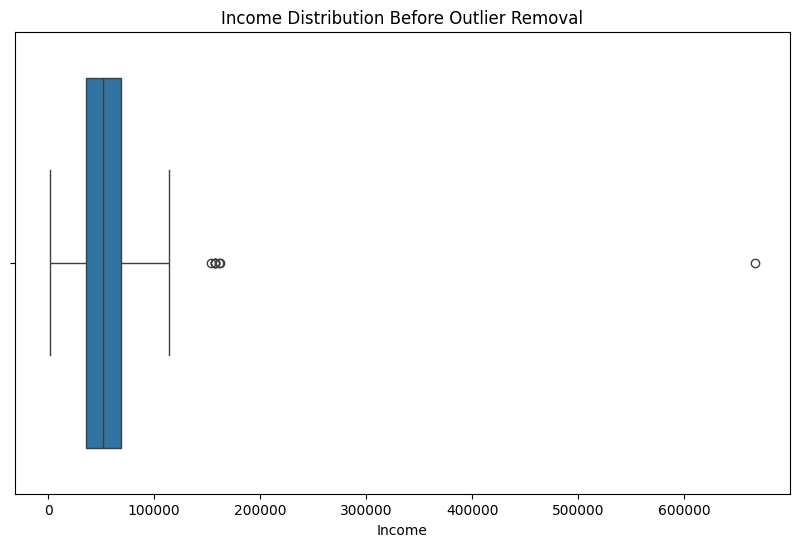

Dataset shape after outlier removal with 3 * IQR: (2239, 29)


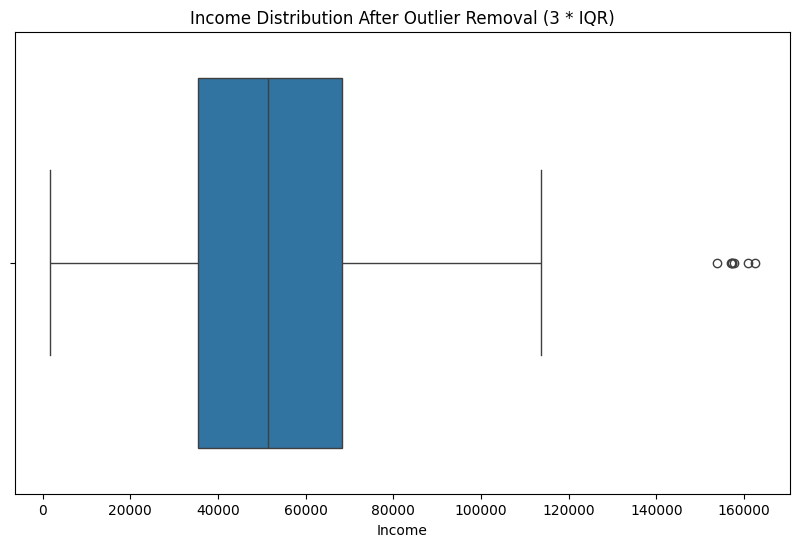


Dataset preview after preprocessing:
      ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  2012-09-04       58   
1  2174        1954  46344.0        1         1  2014-03-08       38   
2  4141        1965  71613.0        0         0  2013-08-21       26   
3  6182        1984  26646.0        1         0  2014-02-10       26   
4  5324        1981  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0       635         88              546  ...          False   
1        11          1                6  ...          False   
2       426         49              127  ...          False   
3        11          4               20  ...          False   
4       173         43              118  ...           True   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                 False                    False                   False 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Fill missing 'Income' values with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Check initial shape
print("Original dataset shape:", df.shape)

# Visualize Income distribution before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution Before Outlier Removal')
plt.show()

# Handle outliers with a more flexible threshold (e.g., 3 * IQR)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Check shape after outlier removal with 3 * IQR
print("Dataset shape after outlier removal with 3 * IQR:", df.shape)

# Visualize Income distribution after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Income Distribution After Outlier Removal (3 * IQR)')
plt.show()

# Continue with encoding and date processing
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Tenure'] = (pd.to_datetime('2025-03-10') - df['Dt_Customer']).dt.days
df['Age'] = 2025 - df['Year_Birth']

# Display the first few rows
print("\nDataset preview after preprocessing:\n", df.head())

In [6]:
# Check the shape of the dataset after outlier removal
print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (113, 36)


## Exploratory Data Analysis (EDA)
Let’s visualize key demographic and behavioral patterns.

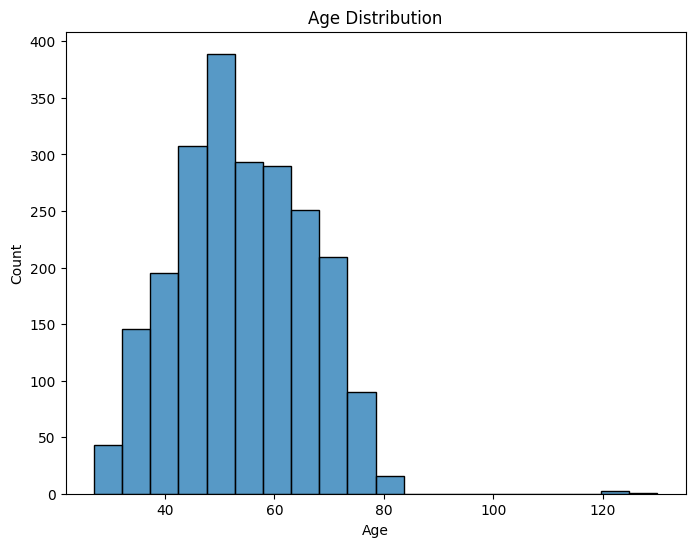

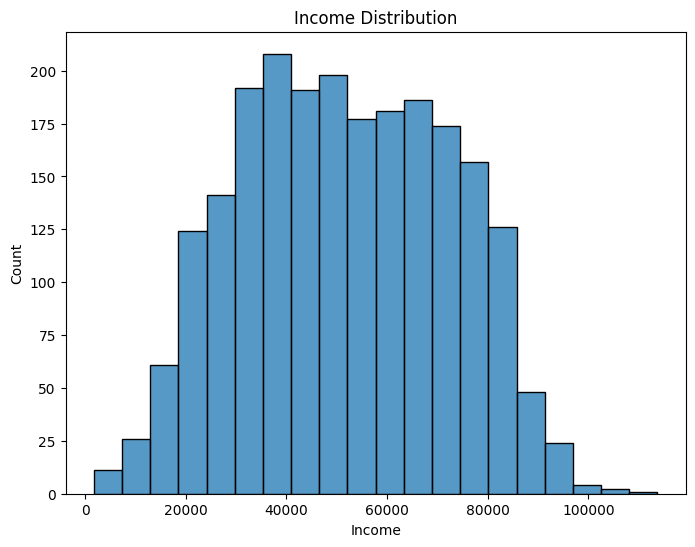

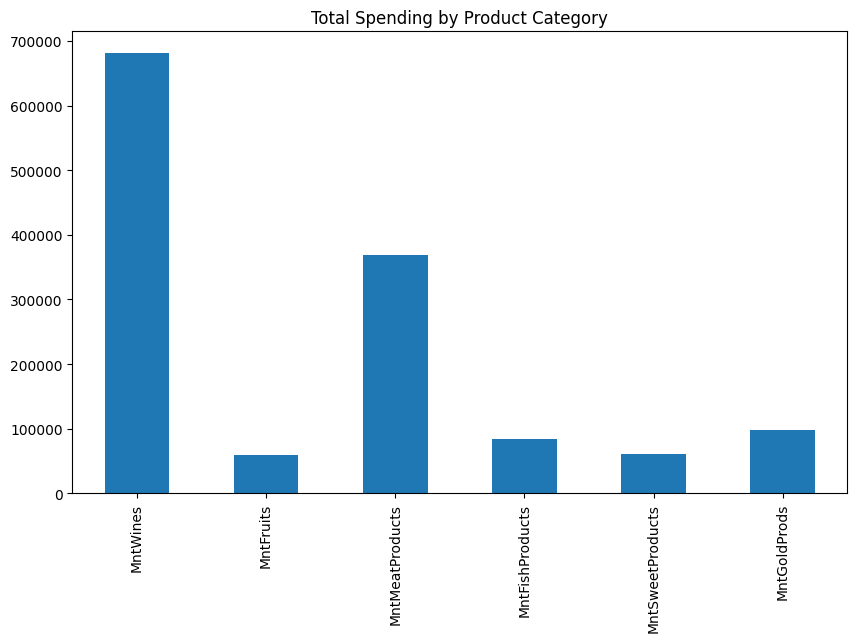

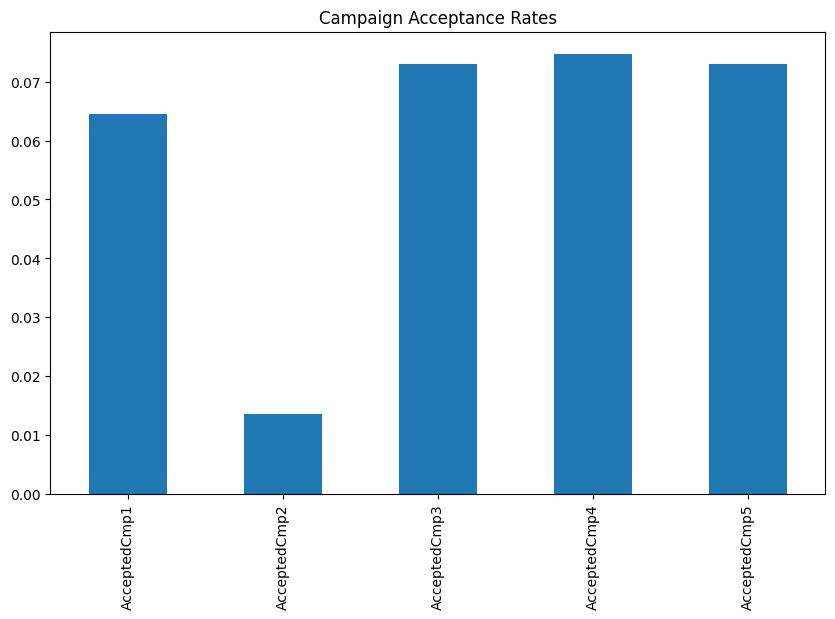

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.show()

# Income distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=20)
plt.title('Income Distribution')
plt.show()

# Spending by product category
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending_cols].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Total Spending by Product Category')
plt.show()

# Campaign acceptance rates
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df[campaign_cols].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Campaign Acceptance Rates')
plt.show()

## Customer Segmentation
We’ll use K-Means clustering to segment customers based on their features.

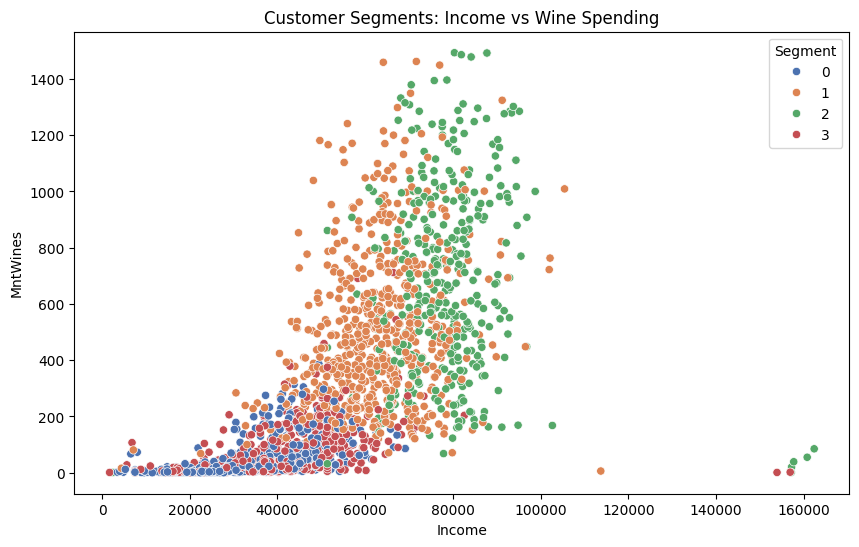

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Income', 'Age', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(df_scaled)

# Visualize segments (Income vs. MntWines)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Segment', data=df, palette='deep')
plt.title('Customer Segments: Income vs Wine Spending')
plt.show()

## Customer Segmentation with Machine Learning
We will use K-Means clustering, enhanced with machine learning techniques, to segment customers based on their demographic and behavioral features. This will provide a data-driven foundation for marketing strategies.

## Marketing Strategy Recommendations
Based on the machine learning-derived segments, here are tailored suggestions:
- **Segment 0: High Income, High Wine Spending**
  - Offer premium wine subscriptions, exclusive wine tasting events, or limited-edition wine collections.
  - Target with personalized emails highlighting luxury wine brands.
- **Segment 1: Low Income, Low Spending**
  - Focus on discounts (e.g., 20% off first purchase), loyalty programs with points for small purchases, and budget-friendly product bundles.
  - Use social media ads to increase engagement with low-cost promotions.
- **Segment 2: Middle Income, Frequent Store Purchases**
  - Promote in-store events (e.g., product demos), bundled offers (e.g., buy 2 get 1 free), and loyalty discounts for frequent shoppers.
  - Encourage in-store sign-ups for a store-specific rewards program.
- **Segment 3: High Income, Low Recency**
  - Send personalized re-engagement campaigns with luxury product incentives (e.g., free gift with purchase over $100).
  - Use targeted ads or SMS reminders to bring them back, emphasizing exclusivity and high-value offers.

Dataset shape after outlier removal: (2239, 29)


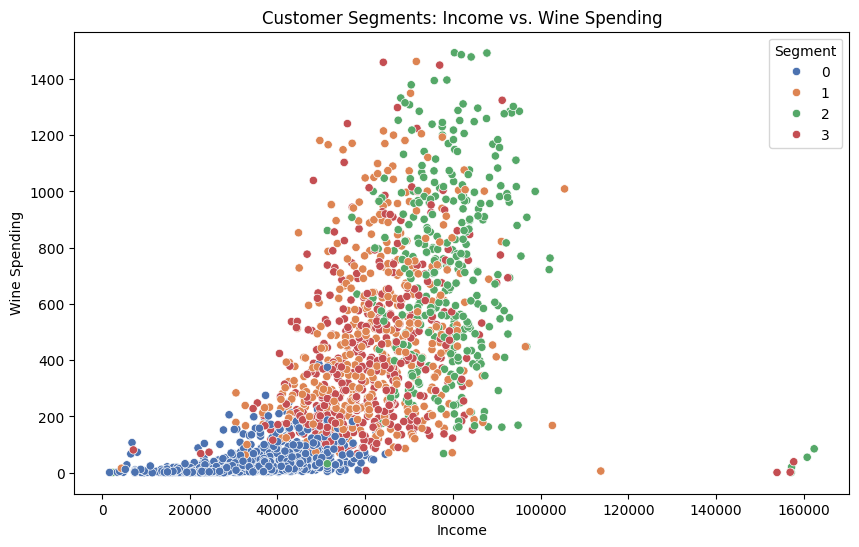


Segment Characteristics (Mean Values):
                Income        Age    Recency    MntWines  MntMeatProducts  \
Segment                                                                    
0        33831.852558  52.899699  48.069208   37.806419        22.038114   
1        62269.045154  60.160793  24.704846  473.414097       172.830396   
2        79121.210526  53.831025  52.437673  713.149584       580.163435   
3        60382.057377  61.686183  74.733021  399.852459       150.056206   

         NumWebPurchases  NumStorePurchases  Customer_Tenure  
Segment                                                       
0               2.032096           3.142427      4228.953862  
1               6.636564           8.310573      4302.546256  
2               4.742382           8.346260      4285.529086  
3               5.611241           7.138173      4268.632319  

Marketing Strategy Recommendations:

Segment 0:
- Offer premium wine subscriptions, exclusive wine tasting events, or limit

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Fill missing 'Income' values with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Handle outliers with 3 * IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Check shape after outlier removal
print("Dataset shape after outlier removal:", df.shape)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Process date and calculate customer tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Tenure'] = (pd.to_datetime('2025-03-10') - df['Dt_Customer']).dt.days

# Calculate age
df['Age'] = 2025 - df['Year_Birth']

# Drop less informative columns
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Select features for clustering
features = ['Income', 'Age', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'Customer_Tenure']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (Income vs. MntWines)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Segment', data=df, palette='deep')
plt.title('Customer Segments: Income vs. Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.show()

# Analyze segment characteristics
segment_summary = df.groupby('Segment')[features].mean()
print("\nSegment Characteristics (Mean Values):\n", segment_summary)

# Marketing Strategy Recommendations (based on segment analysis)
print("\nMarketing Strategy Recommendations:")
for segment in range(4):
    print(f"\nSegment {segment}:")
    if segment == 0:
        print("- Offer premium wine subscriptions, exclusive wine tasting events, or limited-edition wine collections.")
        print("- Target with personalized emails highlighting luxury wine brands.")
    elif segment == 1:
        print("- Focus on discounts (e.g., 20% off first purchase), loyalty programs with points for small purchases, and budget-friendly product bundles.")
        print("- Use social media ads to increase engagement with low-cost promotions.")
    elif segment == 2:
        print("- Promote in-store events (e.g., product demos), bundled offers (e.g., buy 2 get 1 free), and loyalty discounts for frequent shoppers.")
        print("- Encourage in-store sign-ups for a store-specific rewards program.")
    else:  # segment == 3
        print("- Send personalized re-engagement campaigns with luxury product incentives (e.g., free gift with purchase over $100).")
        print("- Use targeted ads or SMS reminders to bring them back, emphasizing exclusivity and high-value offers.")